Note: many sources were used for putting this Notebook together, often code and comments are included as-is from the original source. Sources are provided ahead of the content that was taken from them. Thank you to the creators of the many wonderful Geopandas resources already in existance!

# Exploring Geopandas 

First we need to import our libraries

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point

import pandas as pd

import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

Let's start by making some simple graphs
Source: https://github.com/geohackweek/tutorial_contents

In [2]:
# Let's check the version of the libraries we're using. Do yours look the same as mine?
mpl.__version__, pd.__version__, gpd.__version__

('2.1.1', '0.22.0', '0.3.0')

There are two main data structures in GeoPandas, a GeoSeries and a GeoDataFrame. These are subclasses the Pandas Series and DataFrame, respectively.

In [3]:
# Let's create a GeoSeries, a vector where each entry in the vector is a set of shapes corresponding to one observation.
# We'll use a list of shapely Point objects using the Point constructor (note: you can also make Lines and Polygons)
gs = GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
gs

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [4]:
# Check the type and length of our GeoSeries
type(gs), len(gs)

(geopandas.geoseries.GeoSeries, 3)

In [5]:
# Coordinates are of no use unless you know their reference system. Set the projection/crs to WGS 84, aka EPSG 4326
gs.crs = {'init': 'epsg:4326'}

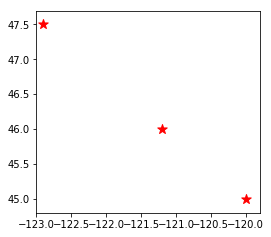

In [6]:
# We can plot our points with the plot function, with some customizations
gs.plot(marker='*', color='red', markersize=100, figsize=(4, 4))

# We limit the bounds to our area, but this will happen by default
plt.xlim([-123, -119.8])
plt.ylim([44.8, 47.7]);

In [7]:
# Now let's make a GeoDataFrame, a tabular data structure that contains a GeoSeries
# Let's define a simple dictionary of lists, that we’ll use again later.
data = {'name': ['House', 'Work', 'Pet Store'],
        'lat': [45, 46, 47.5],
        'lon': [-120, -121.2, -122.9]}
print(data)

{'name': ['House', 'Work', 'Pet Store'], 'lat': [45, 46, 47.5], 'lon': [-120, -121.2, -122.9]}


In [8]:
# Review of using dictionaries
print(list(data.keys()))
print(list(data.values()))
print(data['name'])
print(data['name'][1])

['name', 'lat', 'lon']
[['House', 'Work', 'Pet Store'], [45, 46, 47.5], [-120, -121.2, -122.9]]
['House', 'Work', 'Pet Store']
Work


In [9]:
# Review the built-in zip method
x = [1, 2, 3]
y = [4, 5, 6]
zipped = zip(x, y)
list(zipped)

[(1, 4), (2, 5), (3, 6)]

In [10]:
# Now we create a list of Point shapely objects out of the X & Y coordinate lists
# Very important - the geometry is what makes the data spatial
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]
geometry

In [11]:
type(geometry)

list

In [12]:
# We’ll wrap up by creating a GeoSeries where we explicitly define the index values
# The index is how it orients it in a row format
gs = GeoSeries(geometry, index=data['name'])
gs

House            POINT (-120 45)
Work           POINT (-121.2 46)
Pet Store    POINT (-122.9 47.5)
dtype: object

In [13]:
# Create the a DataFrame using our GeoSeries
df = pd.DataFrame(data)
print(df)

    lat    lon       name
0  45.0 -120.0      House
1  46.0 -121.2       Work
2  47.5 -122.9  Pet Store


In [14]:
# This turned our latitude and longitude 
print(type(data['lon']))
data['lon']

<class 'list'>


[-120, -121.2, -122.9]

In [15]:
# ...into a pandas DataFrame
print(type(df))
df['lon']

<class 'pandas.core.frame.DataFrame'>


0   -120.0
1   -121.2
2   -122.9
Name: lon, dtype: float64

In [16]:
# Finally we use the DataFrame and the “list-of-shapely-Point-objects” approach to create a GeoDataFrame. 
gdf = GeoDataFrame(df, geometry=geometry)

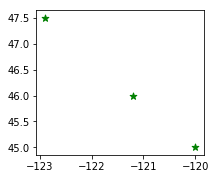

In [17]:
# There’s nothing new to visualize, but this time we’re using the plot method from a GeoDataFrame, not from a GeoSeries. 
gdf.plot(marker='*', color='green', markersize=50, figsize=(3, 3))

# Using Geopandas Datasets
Source: http://geopandas.org/mapping.html

We have now made some point objects, but it's more fun to work with real data. Geopandas comes with some datasets that we can use!

In [18]:
# Load some sample data:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [19]:
# Let's examine the top few rows
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


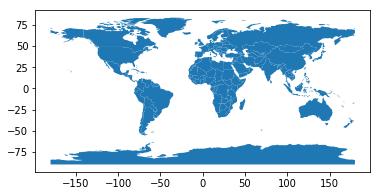

In [20]:
# Plot it
world.plot()

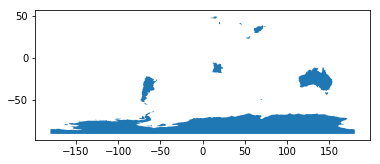

In [21]:
# Let's play with plotting the head and tail 
world.head(10).plot()
# world.tail().plot()
# world.tail(5).plot()

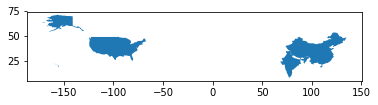

In [22]:
# Plot a few objects by sorting by a column
world.sort_values('pop_est', ascending = False).head(3).plot()

In [23]:
# cities is another geopandas dataset. It includes points for the capitals of each country.
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [24]:
# Again we'll look at the top few rows
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


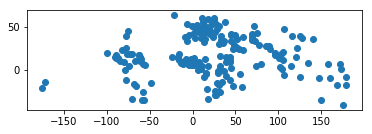

In [25]:
# Plot the cities using the default style
cities.plot()

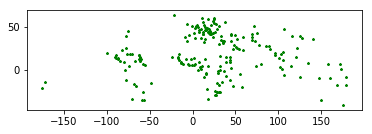

In [26]:
# Plot the cities using custom style
cities.plot(marker='*', color='green', markersize=5)

YOUR TURN #1: Play around with making the city dots different colors and sizes

In [27]:
# Your code here




In [28]:
# We can exclude Antarctica by name
world = world[(world.pop_est>0) & (world.name!="Antarctica") & (world.name!="Fr. S. Antarctic Lands")]

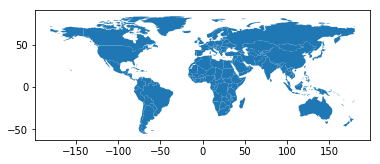

In [29]:
world.plot()

In [30]:
# The data came with a gdp_md_est (estimaited GDP) and a pop_est (estimated population) column, 
# so we can use this data to make a new column, gdp_per_cap (GDP per capita).
# Create a new column named `gdp_per_cap` and calculate existing columns to calculate the GDP.
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

In [31]:
# Let's take a look at the new column
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0.005993
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0.038408
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.014027


In [32]:
# What are the 5 countries with the highest GDP?
world.sort_values('gdp_per_cap', ascending = False).head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
133,833285.0,Asia,Qatar,QAT,91330.0,"POLYGON ((50.81010827006958 24.75474253997138,...",0.109602
97,491775.0,Europe,Luxembourg,LUX,39370.0,"POLYGON ((6.043073357781111 50.12805166279423,...",0.080057
118,4676305.0,Europe,Norway,NOR,276400.0,(POLYGON ((28.16554731620292 71.18547435168051...,0.059106
89,2691158.0,Asia,Kuwait,KWT,149100.0,"POLYGON ((47.9745190773499 29.9758192001485, 4...",0.055404
23,388190.0,Asia,Brunei,BRN,20250.0,"POLYGON ((114.2040165548284 4.525873928236805,...",0.052165


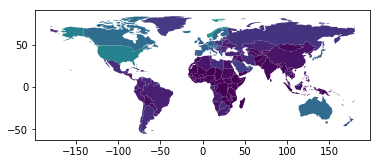

In [33]:
# We can plot the map, coloring our countries by their gdp_per_cap value, creating a choropleth map
world.plot(column='gdp_per_cap')

GeoPandas uses color schemes from [Color Brewer](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3). Check it out!

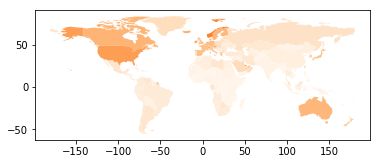

In [34]:
# We can change the style using the cmap (short for `color map`) property
world.plot(column='gdp_per_cap', cmap='Oranges')

# Try setting the cmap property to YlGn

See colormap options [here](https://matplotlib.org/users/colormaps.html).

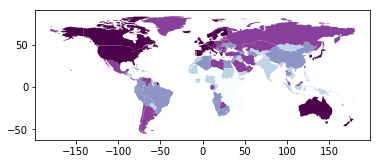

In [35]:
# You can change the default classification scheme, note I also changed the cmap, for fun
base = world.plot(column='gdp_per_cap', cmap='BuPu', scheme='quantiles')

YOUR TURN #2: The scheme option can be set to 'equal_interval', 'quantiles', or 'fisher_jenks'. 
Try out each one. See the difference?

More info on classification schemes [here](http://pysal.readthedocs.io/en/latest/library/esda/mapclassify.html).

In [36]:
# Your code here




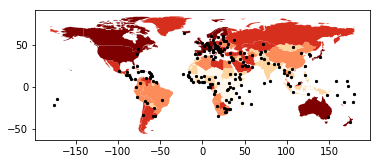

In [37]:
# We can plot the cities on top of our new choropleth map

# Create a variable to hold our choropleth map, call it base
base = world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

# Now when you plot the cities, set an ax property to the variable you just created
cities.plot(ax=base, marker='o', color='black', markersize=5)

# Now you will get them both on the same map

Geopandas is geo-enabled [Pandas](https://pandas.pydata.org/), a Python data science library, so we have everything that comes with Pandas already!

Text(0.5,1,'')

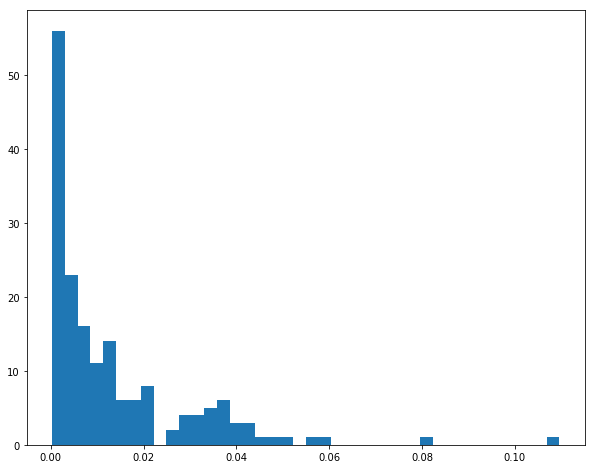

In [38]:
# Make a plot of gdp_per_cap
fig, ax = plt.subplots(figsize=(10,8))
_ = ax.hist(world['gdp_per_cap'], bins=40)
ax.set_title("")

<Container object of 5 artists>

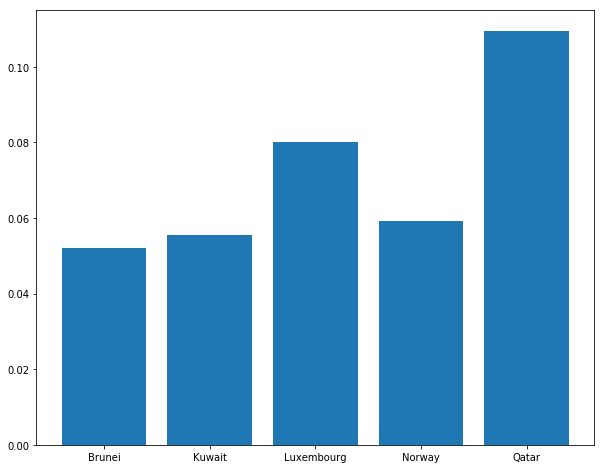

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
y = world.sort_values('gdp_per_cap', ascending = False)['gdp_per_cap'][:5]
x = world.sort_values('gdp_per_cap', ascending = False)['name'][:5]
ax.bar(x,y)

# Managing Projections

Source: http://geopandas.org/projections.html

We saw before how we can set a projection. We can also check a projection and re-project.

When you are doing spatial analysis all of your data MUST be in the same coordinate reference system!

In [40]:
# Check original projection/coordinate system or CRS
world.crs

{'init': 'epsg:4326'}

Text(0.5,1,'WGS84 (lat/lon)')

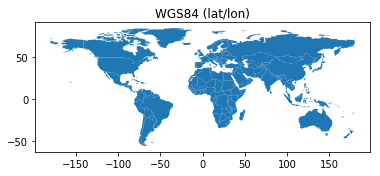

In [41]:
# It's WGS-84, a spherical coordinate system AKA 'epsg:4326'
# It can't be shown on a flat surface but when you try typically gets projected into a Platte Carree projection
# This the the CRS used by GPS/Satellites and GeoJSON
base = world.plot()
base.set_title("WGS84 (lat/lon)")

Text(0.5,1,'Mercator')

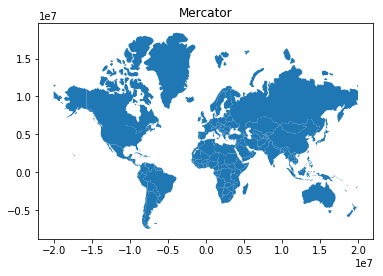

In [42]:
# Set the projection to the Mercator projection (epsg=3395)
world = world.to_crs(epsg=3395)
base = world.plot()
base.set_title("Mercator")

Text(0.5,1,'Polar Stereographic')

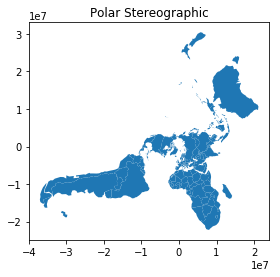

In [43]:
# Set the projection to Polar Stereographic (epsg=3995)
world = world.to_crs(epsg=3995)
base = world.plot()
base.set_title("Polar Stereographic")

Try re-running one of the cells above where you created a plot with just world, it will now be in Polar Steriographic!

YOUR TURN #3: Make a basemap with the Mercator projection and add `cities` to it. Hint: you will have to change the crs of `cities`

In [44]:
# Your code here

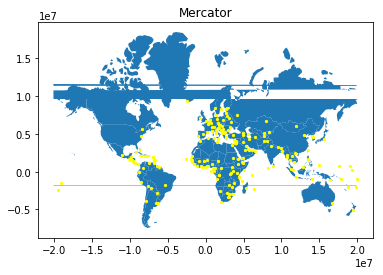

In [45]:
# Answer
world = world.to_crs(epsg=3395)
cities = cities.to_crs(epsg=3395)
base = world.plot()
base.set_title("Mercator")
cities.plot(ax=base, color='yellow', markersize=5)

You might see some streaky lines through your Mercator projection map. This is an oddity!